In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


поля для модели
    
 - национальность (перевод в числовой параметр библиотекой) not null
 - пол (перевод в 1:0 функция пандаса) not null
 - дата рождения (перевод в дату возможно вычислить возраст или год рождения как числовую переменную) null
 - рост и вес  null
 - спорт (перевод в чиловую переменную библиотекой)
 - целевая переменная есть медаль или нет

In [22]:
def split_dob (dob):
    try:
        return dob[-2:]
    except:
        return None
    

#### преобразование

In [25]:
# yob год рождения
data['yob']= data.dob.apply(split_dob)

In [35]:
# удаление пустых строк веса  и роста
data = data.loc[data['height'].notnull()]
data = data.loc[data['weight'].notnull()]

In [37]:
# перевод пола в 1 и 0
data.sex = (data.sex == 'female').astype('int')

In [44]:
# перевод совместной целевой переменной победа/проигрыш
data['win'] = data.gold + data.silver + data.bronze
data.win = (data.win > 0).astype('int')

Модель

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
# данные для модели
selectedColumns = data[['nationality','sex','height','weight','sport', 'yob']]
X = pd.get_dummies (selectedColumns, columns = ['nationality','sport'] )
y = data.win

In [62]:
model = LogisticRegression()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
model.fit(X_train, y_train)

/Users/tatianautkina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Отценка модели

In [92]:
print('train:', model.score(X_train, y_train), 'test:',model.score(X_test, y_test))

train: 0.8434262030854248 test: 0.833793738489871


In [80]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [94]:
print('точность:', (tp + tn) / (tp + fp + fn + tn))

точность: 0.833793738489871


In [95]:
precision = tp / (tp + fp)
precision

0.5

In [85]:
recall = tp / (tp + fn)
recall

0.038781163434903045

In [86]:
from sklearn.metrics import recall_score, precision_score

In [88]:
recall_score(y_test, pred)

0.038781163434903045

In [90]:
precision_score(y_test, pred)

0.5

In [96]:
from sklearn.metrics import roc_curve

In [97]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [98]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.7445152033891254)
(0.0005521811154058532, 0.0, 0.7445152033891255)
(0.0005521811154058532, 0.008310249307479225, 0.6403448376578291)
(0.0016565433462175593, 0.008310249307479225, 0.571738899547245)
(0.0016565433462175593, 0.019390581717451522, 0.5534969787447722)
(0.0022087244616234127, 0.019390581717451522, 0.5494942696143484)
(0.0022087244616234127, 0.024930747922437674, 0.5455533113724622)
(0.0027609055770292656, 0.024930747922437674, 0.5430071940107933)
(0.0027609055770292656, 0.0332409972299169, 0.5238856553341648)
(0.0033130866924351186, 0.0332409972299169, 0.5192000699099985)


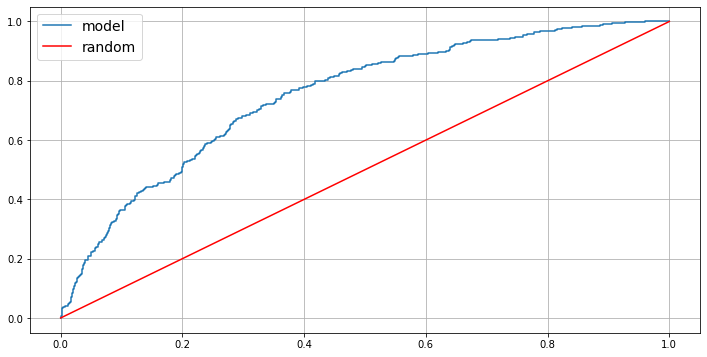

In [104]:
plt.figure(figsize=(12,6))
plt.plot( fpr, tpr , label = 'model')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), c='red', label = 'random')
plt.legend( loc = 0, fontsize=14)
plt.grid()

In [105]:
from sklearn.metrics import roc_curve

In [106]:
from sklearn.metrics import roc_auc_score

In [108]:
roc_auc_score( y_test, predictions[:, 1] )

0.7495560372056883

Вывод:
Модель построенна лучше чем случайные значения